<a href="https://colab.research.google.com/github/Amoghkori/steganography/blob/main/split_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
from keras.models import Model
from keras.layers import Dense, Input, concatenate, Conv2D
from keras.models import load_model
from keras.utils import plot_model

In [ ]:
model=load_model("/content/drive/MyDrive/models_mix/steg_model-84-0.04.hdf5", compile=False)

# Print model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
secret (InputLayer)             [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
prep_conv3x3_1 (Conv2D)         (None, 224, 224, 50) 1400        secret[0][0]                     
__________________________________________________________________________________________________
prep_conv4x4_1 (Conv2D)         (None, 224, 224, 50) 2450        secret[0][0]                     
__________________________________________________________________________________________________
prep_conv5x5_1 (Conv2D)         (None, 224, 224, 50) 3800        secret[0][0]                     
______________________________________________________________________________________________

In [ ]:
# Generate hiding network
encoder=Model([model.get_layer('secret').input,model.get_layer('cover').input],model.get_layer('hide_conv_f').output)
encoder.save("/content/drive/MyDrive/models_mix/hide2.h5")

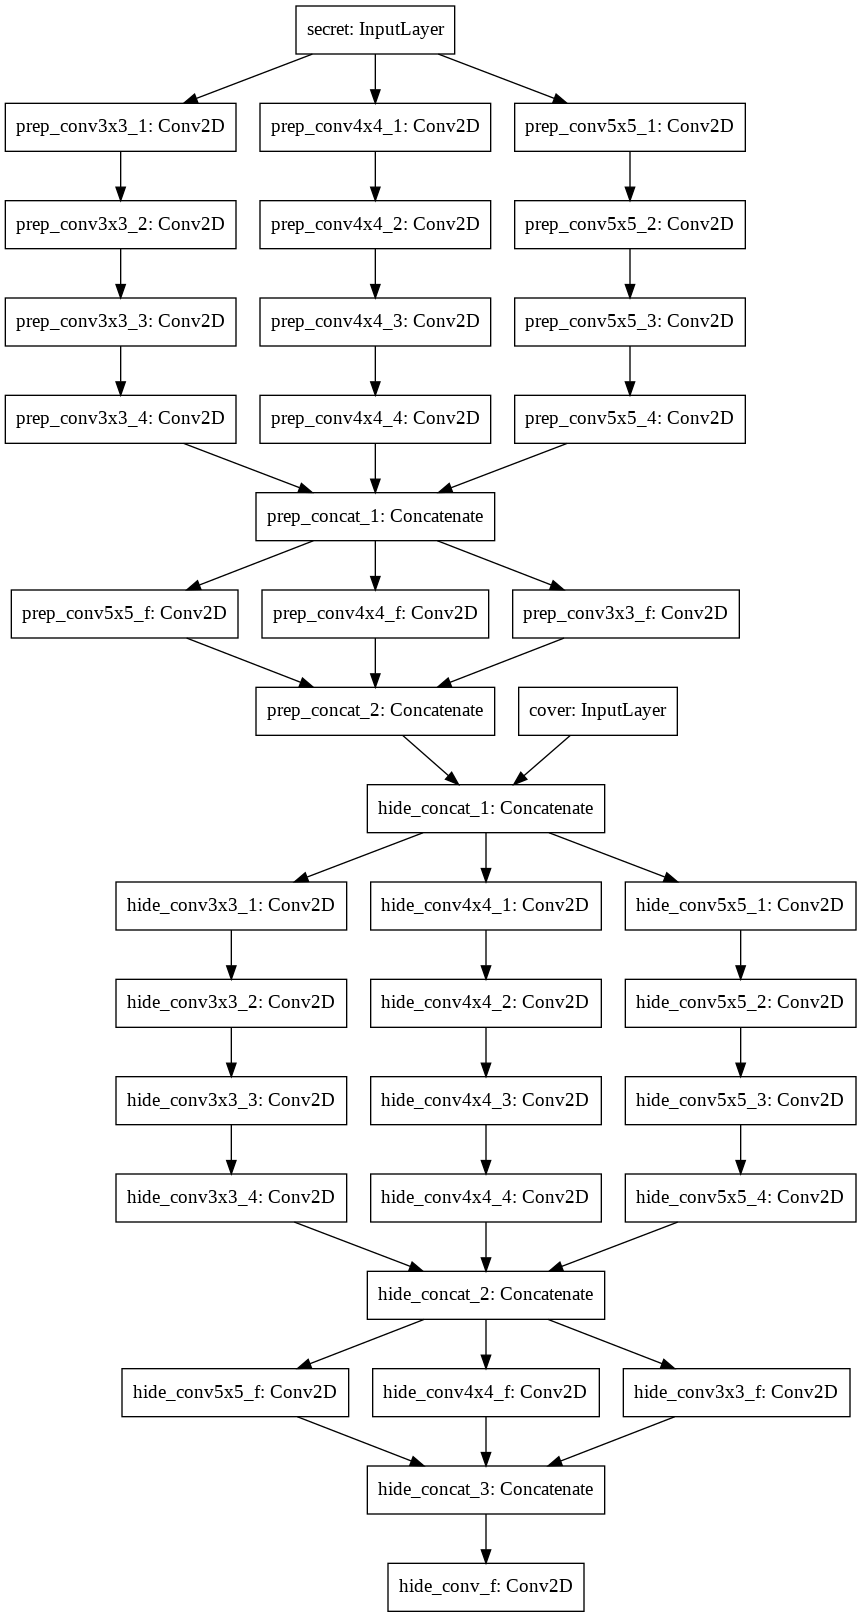

In [ ]:
plot_model(encoder, to_file='hide.png')

In [ ]:
new_ip=Input(shape=(224,224,3))

# Reveal network [Re-initialize layer and weights]
rconv_3x3=Conv2D(50, kernel_size=3, padding="same", activation='relu',kernel_initializer='he_normal', name='revl_conv3x3_1')(new_ip)
rconv_3x3=BatchNormalization()(rconv_3x3)
rconv_3x3=SpatialDropout2D(0.2)(rconv_3x3)
rconv_3x3=Conv2D(50, kernel_size=3, padding="same", activation='relu',kernel_initializer='he_normal', name='revl_conv3x3_2')(rconv_3x3)
rconv_3x3=BatchNormalization()(rconv_3x3)
rconv_3x3=SpatialDropout2D(0.2)(rconv_3x3)
rconv_3x3=Conv2D(50, kernel_size=3, padding="same", activation='relu',kernel_initializer='he_normal', name='revl_conv3x3_3')(rconv_3x3)
rconv_3x3=BatchNormalization()(rconv_3x3)
rconv_3x3=SpatialDropout2D(0.2)(rconv_3x3)
rconv_3x3=Conv2D(50, kernel_size=3, padding="same", activation='relu',kernel_initializer='he_normal', name='revl_conv3x3_4')(rconv_3x3)
rconv_3x3=BatchNormalization()(rconv_3x3)
rconv_3x3=SpatialDropout2D(0.2)(rconv_3x3)

rconv_4x4=Conv2D(50, kernel_size=4, padding="same", activation='relu',kernel_initializer='he_normal', name='revl_conv4x4_1')(new_ip)
rconv_4x4=BatchNormalization()(rconv_4x4)
rconv_4x4=SpatialDropout2D(0.2)(rconv_4x4)
rconv_4x4=Conv2D(50, kernel_size=4, padding="same", activation='relu',kernel_initializer='he_normal', name='revl_conv4x4_2')(rconv_4x4)
rconv_4x4=BatchNormalization()(rconv_4x4)
rconv_4x4=SpatialDropout2D(0.2)(rconv_4x4)
rconv_4x4=Conv2D(50, kernel_size=4, padding="same", activation='relu',kernel_initializer='he_normal', name='revl_conv4x4_3')(rconv_4x4)
rconv_4x4=BatchNormalization()(rconv_4x4)
rconv_4x4=SpatialDropout2D(0.2)(rconv_4x4)
rconv_4x4=Conv2D(50, kernel_size=4, padding="same", activation='relu',kernel_initializer='he_normal', name='revl_conv4x4_4')(rconv_4x4)
rconv_4x4=BatchNormalization()(rconv_4x4)
rconv_4x4=SpatialDropout2D(0.2)(rconv_4x4)

rconv_5x5=Conv2D(50, kernel_size=5, padding="same", activation='relu',kernel_initializer='he_normal', name='revl_conv5x5_1')(new_ip)
rconv_5x5=BatchNormalization()(rconv_5x5)
rconv_5x5=SpatialDropout2D(0.2)(rconv_5x5)
rconv_5x5=Conv2D(50, kernel_size=5, padding="same", activation='relu',kernel_initializer='he_normal', name='revl_conv5x5_2')(rconv_5x5)
rconv_5x5=BatchNormalization()(rconv_5x5)
rconv_5x5=SpatialDropout2D(0.2)(rconv_5x5)
rconv_5x5=Conv2D(50, kernel_size=5, padding="same", activation='relu',kernel_initializer='he_normal', name='revl_conv5x5_3')(rconv_5x5)
rconv_5x5=BatchNormalization()(rconv_5x5)
rconv_5x5=SpatialDropout2D(0.2)(rconv_5x5)
rconv_5x5=Conv2D(50, kernel_size=5, padding="same", activation='relu',kernel_initializer='he_normal', name='revl_conv5x5_4')(rconv_5x5)
rconv_5x5=BatchNormalization()(rconv_5x5)
rconv_5x5=SpatialDropout2D(0.2)(rconv_5x5)

rconcat_1 = concatenate([rconv_3x3,rconv_4x4,rconv_5x5], axis=3, name="revl_concat_1")

rconv_5x5=Conv2D(50, kernel_size=5, padding="same", activation='relu',kernel_initializer='he_normal', name='revl_conv5x5_f')(rconcat_1)
rconv_5x5=BatchNormalization()(rconv_5x5)
rconv_5x5=SpatialDropout2D(0.2)(rconv_5x5)
rconv_4x4=Conv2D(50, kernel_size=4, padding="same", activation='relu',kernel_initializer='he_normal', name='revl_conv4x4_f')(rconcat_1)
rconv_4x4=BatchNormalization()(rconv_4x4)
rconv_4x4=SpatialDropout2D(0.2)(rconv_4x4)
rconv_3x3=Conv2D(50, kernel_size=3, padding="same", activation='relu',kernel_initializer='he_normal', name='revl_conv3x3_f')(rconcat_1)
rconv_3x3=BatchNormalization()(rconv_3x3)
rconv_3x3=SpatialDropout2D(0.2)(rconv_3x3)

rconcat_f1 = concatenate([rconv_5x5,rconv_4x4,rconv_3x3], axis=3, name="revl_concat_2")

secret_pred = Conv2D(3, kernel_size=1, padding="same", name='revl_conv_f')(rconcat_f1)

# Generate reveal network
decoder=Model(new_ip,secret_pred)

In [ ]:
decoder.load_weights("/content/drive/MyDrive/models_mix/steg_model-84-0.04.hdf5", by_name=True)
decoder.save('/content/drive/MyDrive/models_mix/reveal2.h5')


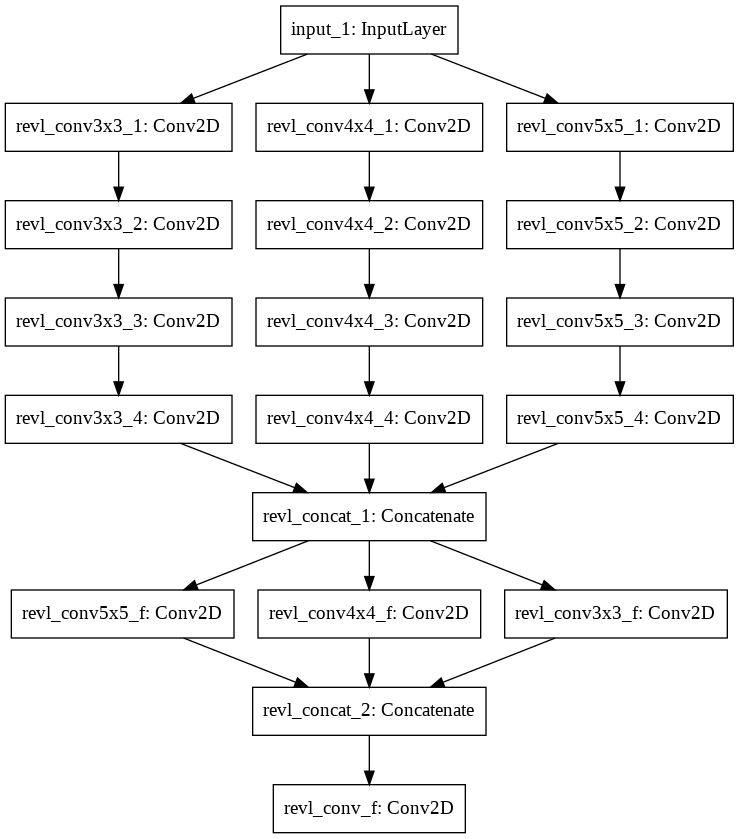

In [ ]:
plot_model(decoder, to_file='reveal.png')